                                               Model   Company       Color  \
0             5PLUS 5PHP28 Wired without Mic Headset     5PLUS         Red   
1  A R Wireless compatible with Headset Bluetooth...       A R         Red   
2  Aerizo Wireless Touch R100 Earbuds (Black) Blu...    Aerizo       Black   
3  Allmusic powerful driven bass with dynamic bea...  Allmusic  Multicolor   
4  Allmusic OPP.O Ultra HD Sound Premium Bass Spo...  Allmusic       Black   

             Type  Average Rating  Number of Ratings  Selling Price  \
0      On the Ear             3.6                101            496   
1      Multicolor             3.9              35280            188   
2   True Wireless             4.0               1934            589   
3      In the Ear             4.0              15841            260   
4      In the Ear             3.8              10766            270   

   Maximum Retail Price  Discount  
0                  3399      2903  
1                   799       61

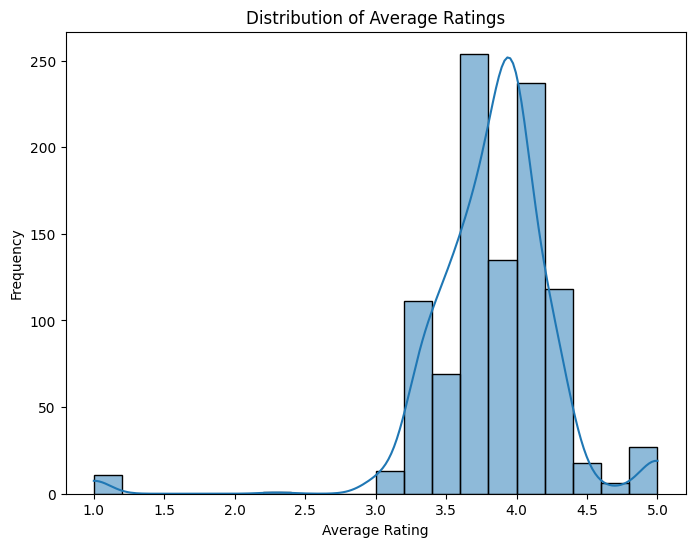

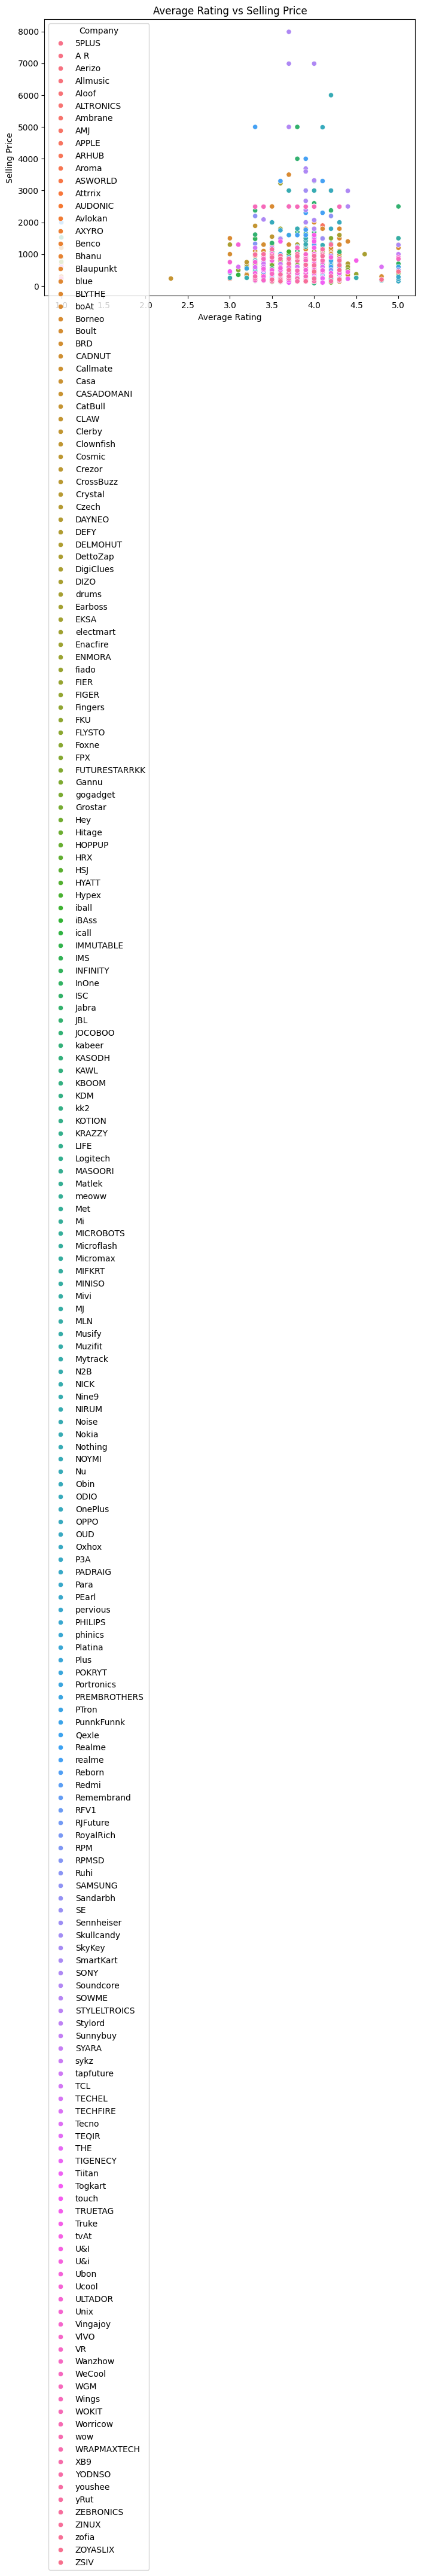

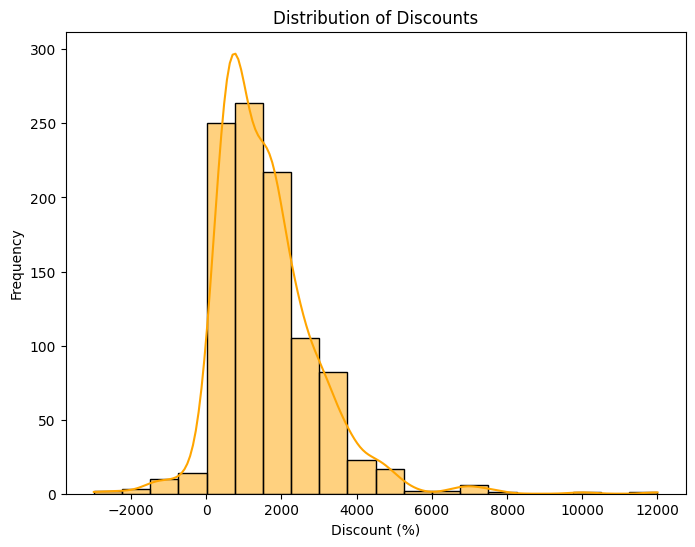

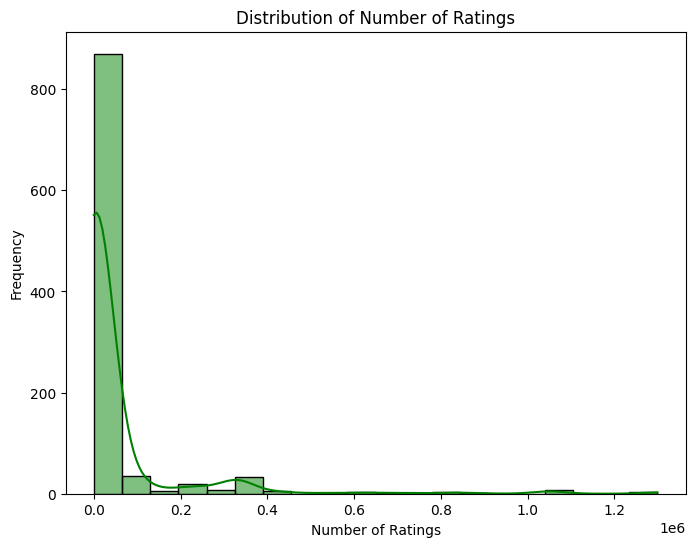

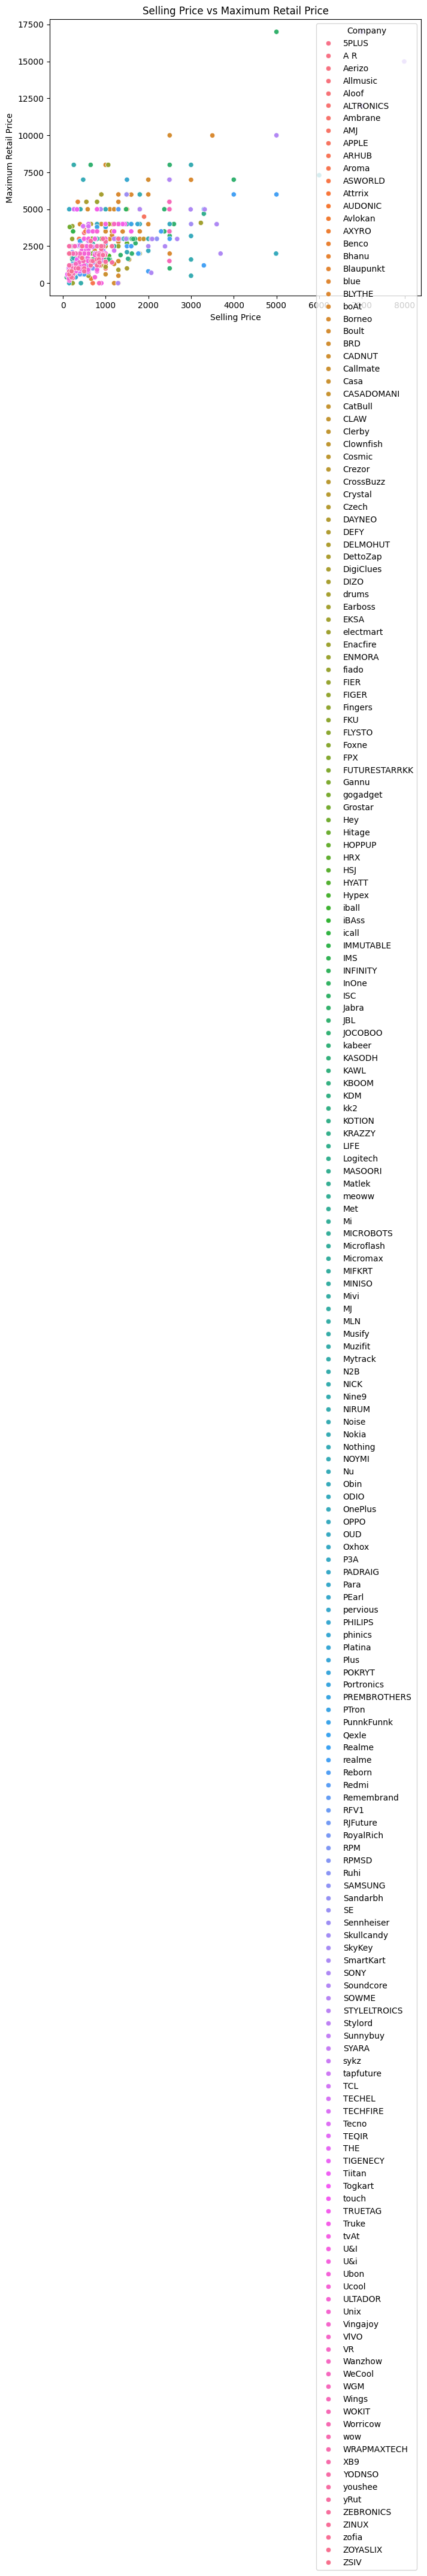

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
file_path = 'Flipkart Headphones.csv'  # Update this to the correct path
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to ensure it's read correctly
print(df.head())

# Data Information
print(df.info())
print(df.describe())

# 1. Distribution of Average Ratings
plt.figure(figsize=(8,6))
sns.histplot(df['Average Rating'], bins=20, kde=True)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

# 2. Correlation between Ratings and Selling Price
plt.figure(figsize=(8,6))
sns.scatterplot(x='Average Rating', y='Selling Price', data=df, hue='Company')
plt.title('Average Rating vs Selling Price')
plt.xlabel('Average Rating')
plt.ylabel('Selling Price')
plt.show()

# 3. Distribution of Discounts
plt.figure(figsize=(8,6))
sns.histplot(df['Discount'], bins=20, kde=True, color='orange')
plt.title('Distribution of Discounts')
plt.xlabel('Discount (%)')
plt.ylabel('Frequency')
plt.show()

# 4. Distribution of Number of Ratings
plt.figure(figsize=(8,6))
sns.histplot(df['Number of Ratings'], bins=20, kde=True, color='green')
plt.title('Distribution of Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

# 5. Relationship between Selling Price and Maximum Retail Price
plt.figure(figsize=(8,6))
sns.scatterplot(x='Selling Price', y='Maximum Retail Price', data=df, hue='Company')
plt.title('Selling Price vs Maximum Retail Price')
plt.xlabel('Selling Price')
plt.ylabel('Maximum Retail Price')
plt.show()

# 6. Calculate Discount Percentage (if not present)
if 'Discount' not in df.columns:
    df['Discount'] = ((df['Maximum Retail Price'] - df['Selling Price']) / df['Maximum Retail Price']) * 100

# Save cleaned data
df.to_csv('Cleaned_Flipkart_Headphones.csv', index=False)

# Additional analysis like customer segmentation can be performed based on the discount, price range, etc.


In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load the dataset
df = pd.read_csv('Flipkart Headphones.csv')

# Display the first few rows and check column names
print("First few rows of the dataset:")
print(df.head())
print("Columns in the dataset:", df.columns)

# Handle missing values if any (drop rows with missing values for simplicity)
df = df.dropna()

# Select features and target variable
features = ['Color', 'Company', 'Type', 'Average Rating', 'Number of Ratings', 'Maximum Retail Price', 'Discount']
target = 'Selling Price'

X = df[features]
y = df[target]

# Encode categorical variables (Color, Company, Type)
for col in ['Color', 'Company', 'Type']:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Scale the features for better LSTM performance
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshape input data to be 3-dimensional (samples, timesteps, features) for LSTM
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build LSTM model
model = Sequential([
    LSTM(64, input_shape=(1, X_scaled.shape[2]), return_sequences=True),
    Dropout(0.3),
    LSTM(32),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)  # Predicting a single value (Selling Price)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Display the model's architecture
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=32)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Mean Absolute Error: {mae:.2f}")

First few rows of the dataset:
                                               Model   Company       Color  \
0             5PLUS 5PHP28 Wired without Mic Headset     5PLUS         Red   
1  A R Wireless compatible with Headset Bluetooth...       A R         Red   
2  Aerizo Wireless Touch R100 Earbuds (Black) Blu...    Aerizo       Black   
3  Allmusic powerful driven bass with dynamic bea...  Allmusic  Multicolor   
4  Allmusic OPP.O Ultra HD Sound Premium Bass Spo...  Allmusic       Black   

             Type  Average Rating  Number of Ratings  Selling Price  \
0      On the Ear             3.6                101            496   
1      Multicolor             3.9              35280            188   
2   True Wireless             4.0               1934            589   
3      In the Ear             4.0              15841            260   
4      In the Ear             3.8              10766            270   

   Maximum Retail Price  Discount  
0                  3399      2903  
1

/var/folders/fn/624d8wl95yjgrhtrplfm7z5h0000gn/T/ipykernel_1006/1564808365.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
/var/folders/fn/624d8wl95yjgrhtrplfm7z5h0000gn/T/ipykernel_1006/1564808365.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
/var/folders/fn/624d8wl95yjgrhtrplfm7z5h0000gn/T/ipykernel_1006/1564808365.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 64)          │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,937 (124.75 KB)

 Trainable params: 31,937 (124.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1481259.5000 - mae: 868.6660 - val_loss: 1237119.6250 - val_mae: 806.4794
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 1180767.3750 - mae: 799.8786 - val_loss: 1235471.8750 - val_mae: 805.4927
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1482063.5000 - mae: 862.4883 - val_loss: 1228186.2500 - val_mae: 801.1214
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1309597.3750 - mae: 821.0630 - val_loss: 1209136.3750 - val_mae: 789.3638
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1271545.3750 - mae: 802.2139 - val_loss: 1183427.6250 - val_mae: 772.9084
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1093343.5000 - mae: 754.7057 - val_loss: 1158116.5000 - val_mae: 756.2411
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1399388.0000 - mae: 829.9717 - val_loss: 1133787.2500 - val_mae: 739.8858
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1196572.8750 - m

In [3]:
# Load the cleaned dataset
df_cleaned = pd.read_csv("Cleaned_Flipkart_Headphones.csv")

# Define sentiment based on Average Rating
def get_sentiment(rating):
    if rating >= 4:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    else:
        return 'negative'

# Apply the function to create a 'label' column
df_cleaned['label'] = df_cleaned['Average Rating'].apply(get_sentiment)

# Display the first few rows of the updated DataFrame
print(df_cleaned.head())


                                               Model   Company       Color  \
0             5PLUS 5PHP28 Wired without Mic Headset     5PLUS         Red   
1  A R Wireless compatible with Headset Bluetooth...       A R         Red   
2  Aerizo Wireless Touch R100 Earbuds (Black) Blu...    Aerizo       Black   
3  Allmusic powerful driven bass with dynamic bea...  Allmusic  Multicolor   
4  Allmusic OPP.O Ultra HD Sound Premium Bass Spo...  Allmusic       Black   

             Type  Average Rating  Number of Ratings  Selling Price  \
0      On the Ear             3.6                101            496   
1      Multicolor             3.9              35280            188   
2   True Wireless             4.0               1934            589   
3      In the Ear             4.0              15841            260   
4      In the Ear             3.8              10766            270   

   Maximum Retail Price  Discount     label  
0                  3399      2903  negative  
1           

In [6]:
# Importing required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset
import torch
from transformers import AdamW

# Load the dataset
df = pd.read_csv('Cleaned_Flipkart_Headphones.csv')

# Display the first few rows of the dataset and its columns
print("First few rows of the dataset:")
print(df.head())
print("Columns in the dataset:", df.columns)

# Handle missing values (drop rows with missing values for simplicity)
df = df.dropna()

# Assuming we have a 'Review' column and a target column 'Sentiment' for sentiment classification
# We will fine-tune BERT for sentiment analysis
# Define features and target variable
reviews = df['Review']  # Replace 'Review' with the actual column name for product reviews in your dataset
labels = df['Sentiment']  # Replace 'Sentiment' with sentiment label column (e.g., Positive, Negative, Neutral)

# Encode the target labels into numerical format
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the reviews
max_length = 128  # Set max length for tokenization
input_ids = []
attention_masks = []

for review in reviews:
    encoded_data = tokenizer.encode_plus(
        review,
        add_special_tokens=True,  # Add [CLS] and [SEP]
        max_length=max_length,
        padding='max_length',  # Pad all reviews to the same length
        truncation=True,  # Truncate longer reviews
        return_attention_mask=True,  # Return attention mask
        return_tensors='pt'  # Return PyTorch tensors
    )
    input_ids.append(encoded_data['input_ids'])
    attention_masks.append(encoded_data['attention_mask'])

# Convert lists to tensors
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(encoded_labels)

# Split the data into training and testing sets
train_inputs, test_inputs, train_labels, test_labels = train_test_split(input_ids, labels, test_size=0.2, random_state=42)
train_masks, test_masks, _, _ = train_test_split(attention_masks, labels, test_size=0.2, random_state=42)

# Create DataLoader for training and testing sets
batch_size = 16
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

test_data = TensorDataset(test_inputs, test_masks, test_labels)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

# Load pre-trained BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)  # 3 for positive/negative/neutral

# Set optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)

# Fine-tune the model
epochs = 3

for epoch in range(epochs):
    model.train()
    total_loss = 0
    
    for batch in train_dataloader:
        input_ids, attention_masks, labels = batch
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(input_ids, attention_mask=attention_masks, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()
        
        # Backward pass
        loss.backward()
        
        # Update weights
        optimizer.step()

    avg_train_loss = total_loss / len(train_dataloader)
    print(f'Epoch {epoch + 1}/{epochs} - Average training loss: {avg_train_loss:.4f}')

# Evaluate the model on test data
model.eval()

correct = 0
total = 0

with torch.no_grad():
    for batch in test_dataloader:
        input_ids, attention_masks, labels = batch
        
        outputs = model(input_ids, attention_mask=attention_masks)
        logits = outputs.logits
        
        # Get the predicted class with the highest score
        predictions = torch.argmax(logits, dim=1)
        
        # Calculate accuracy
        correct += (predictions == labels).sum().item()
        total += labels.size(0)

accuracy = correct / total
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Inference - Predict sentiment for a new review
def predict_sentiment(review):
    model.eval()
    encoded_data = tokenizer.encode_plus(
        review,
        add_special_tokens=True,
        max_length=max_length,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt'
    )
    
    input_ids = encoded_data['input_ids']
    attention_mask = encoded_data['attention_mask']
    
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        sentiment_class = torch.argmax(logits, dim=1).item()

    # Return predicted sentiment (decoded using label_encoder)
    return label_encoder.inverse_transform([sentiment_class])[0]

# Example usage
new_review = "This headphone is amazing with superb sound quality!"
predicted_sentiment = predict_sentiment(new_review)
print(f"Predicted Sentiment: {predicted_sentiment}")

First few rows of the dataset:
                                               Model   Company       Color  \
0             5PLUS 5PHP28 Wired without Mic Headset     5PLUS         Red   
1  A R Wireless compatible with Headset Bluetooth...       A R         Red   
2  Aerizo Wireless Touch R100 Earbuds (Black) Blu...    Aerizo       Black   
3  Allmusic powerful driven bass with dynamic bea...  Allmusic  Multicolor   
4  Allmusic OPP.O Ultra HD Sound Premium Bass Spo...  Allmusic       Black   

             Type  Average Rating  Number of Ratings  Selling Price  \
0      On the Ear             3.6                101            496   
1      Multicolor             3.9              35280            188   
2   True Wireless             4.0               1934            589   
3      In the Ear             4.0              15841            260   
4      In the Ear             3.8              10766            270   

   Maximum Retail Price  Discount  
0                  3399      2903  
1

KeyError: 'Review'

In [7]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the cleaned dataset
df = pd.read_csv('Cleaned_Flipkart_Headphones.csv')

# Display the first few rows of the dataset
print(df.head())

# Define a function to derive sentiment from 'Average Rating'
def get_sentiment(rating):
    if rating >= 4:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    else:
        return 'negative'

# Apply the function to create a 'Sentiment' column
df['Sentiment'] = df['Average Rating'].apply(get_sentiment)

# Select the features you want to use for training
features = ['Selling Price', 'Maximum Retail Price', 'Discount', 'Number of Ratings']
X = df[features]

# Encode the target sentiment labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Sentiment'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Print classification report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


                                               Model   Company       Color  \
0             5PLUS 5PHP28 Wired without Mic Headset     5PLUS         Red   
1  A R Wireless compatible with Headset Bluetooth...       A R         Red   
2  Aerizo Wireless Touch R100 Earbuds (Black) Blu...    Aerizo       Black   
3  Allmusic powerful driven bass with dynamic bea...  Allmusic  Multicolor   
4  Allmusic OPP.O Ultra HD Sound Premium Bass Spo...  Allmusic       Black   

             Type  Average Rating  Number of Ratings  Selling Price  \
0      On the Ear             3.6                101            496   
1      Multicolor             3.9              35280            188   
2   True Wireless             4.0               1934            589   
3      In the Ear             4.0              15841            260   
4      In the Ear             3.8              10766            270   

   Maximum Retail Price  Discount  
0                  3399      2903  
1                   799       61

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metr

In [1]:
pip install transformers torch pandas


DEPRECATION: Loading egg at /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/jupyter-1.0.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel

# Load the CSV file into a DataFrame
file_name = 'Flipkart Headphones.csv'
df = pd.read_csv(file_name)

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Define a function to generate BERT embeddings for a review
def get_bert_embeddings(review):
    # Tokenize the review text and convert to input tensors
    inputs = tokenizer(review, return_tensors='pt', truncation=True, padding=True, max_length=128)
    
    # Get BERT outputs
    with torch.no_grad():  # No need to compute gradients
        outputs = model(**inputs)
    
    # Get the embeddings (last hidden state)
    embeddings = outputs.last_hidden_state.mean(dim=1)  # Mean pooling over sequence length
    return embeddings.squeeze().numpy()  # Convert tensor to numpy

# Apply the function to the 'reviews' column to generate embeddings for each review
df['bert_embeddings'] = df['reviews'].apply(get_bert_embeddings)

# Save the updated DataFrame to a new CSV file (if you want to save it)
df.to_csv('headphones_data_with_bert_embeddings.csv', index=False)

print("BERT embeddings generated and file saved successfully.")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


BERT embeddings generated and file saved successfully.
